In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,9

import pymysql
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt


import seaborn as sns

# Название таблицы
table_db = 'yellow_tripdata'

# Количество записей в результате
limit = 10000

# Подулючаемся в БД в MySQL
connection = pymysql.connect(
    host = '172.21.195.57',
    port = 3307,
    user = 'cryptoUser',
    password = '123456789',
    db = 'netology_data',
    cursorclass = pymysql.cursors.SSDictCursor
)

# Наш запрос
query = f'select * from {table_db} limit {limit}'

connection

In [2]:
%%time
# Получаем в df наши данные
df = pd.read_sql(query, connection)
df.head()

# Создаем дубликат df
df2 = df.copy(deep=True)

Wall time: 1.32 s


In [3]:
# Оставляем только нужные столбцы
df = df[['trip_distance', 'tip_amount', 'passenger_count']]
df.head()

,trip_distance,tip_amount,passenger_count
0,2,1.65,1
1,3,1.00,1
2,0,0.00,3
3,0,0.00,5
4,0,0.00,5


In [4]:
"""
Я хотел бы узнать есть ли зависимость получения чаевых (получил или нет) от:
    1. Расстояния поездки
    2. Количества пассажиров
    
    
Т.е. мы хотим узнать сколько % поездок, которые завершились получением чаевых в зависимости от расстояния
"""


# Создаем признак получения чаевых (0/1)
df['has_tips'] = df['tip_amount'].apply(lambda tip: 1 if tip > 0  else 0)

# Делаем группировку и суммируем (чтобы посчитать количество поездок, где водитель получил чаевые)
df = df.groupby('trip_distance').sum().reset_index()

# Во втором df создаем столбец с `1`
df2['count'] = 1
# Группируем, суммируем и получаем общее количество поездок
df2 = df2.groupby('trip_distance').sum().reset_index()[['trip_distance', 'count']]




In [5]:
# Контроль df
df = df[ ['trip_distance', 'has_tips'] ]
df.head()

,trip_distance,has_tips
0,0,226
1,1,2050
2,2,1443
3,3,823
4,4,517


In [6]:
# Контроль df2
df2.head()

,trip_distance,count
0,0,525
1,1,3387
2,2,2302
3,3,1305
4,4,800


In [7]:
# Результирующий df3
# Объединаем два наших df
df3 = pd.merge(df, df2, on='trip_distance', how='left')

# Здесь храним отношением поездок с чаевыми к общему количеству поездок (по каждой дистанции)
df3['otn'] = df3['has_tips'] / df3['count']

# Контроль df3
df3.head()

,trip_distance,has_tips,count,otn
0,0,226,525,0.430476
1,1,2050,3387,0.605255
2,2,1443,2302,0.626846
3,3,823,1305,0.630651
4,4,517,800,0.646250


In [8]:
# Просто для удобства
x = df3['trip_distance']
y = df3['otn']

'\nВидим, что % поездок "с чаевыми" и "без чаевых" не выдает нам каких-то взаимосвязей.\nЕдинственное, что можно увидеть, это падение "отношения" в интервале 5-15 км. Далее иде резкий рост показателя\n'

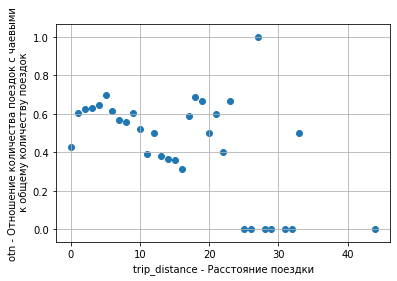

In [10]:
# Рисуем график
plt.ylabel('otn - Отношение количества поездок с чаевыми\n к общему количеству поездок')
plt.xlabel('trip_distance - Расстояние поездки')

plt.grid(True)
# plt.bar(x, y)
# plt.plot(x)
# plt.plot(y)
# plt.bar(x, y)
plt.scatter(x, y)


"""
Видим, что % поездок "с чаевыми" и "без чаевых" не выдает нам каких-то взаимосвязей.
Единственное, что можно увидеть, это падение "отношения" в интервале 5-15 км. Далее иде резкий рост показателя
"""